# Aprendizado Supervisionado

Vamos começar o estudo da aprendizagem de máquina com o tipo de aprendizado denominado de **Supervisionado**. 

> * **Aprendizado Supervisionado (*Supervised Learning*):** A training set of examples with the correct responses (targets) is provided and, based on this training set, the algorithm generalises to respond correctly to all possible inputs. This also colled learning from exemplars.

Um algoritmo supervisionado é uma função que, dado um conjunto de exemplos rotulados, constrói um *preditor*. Os rótulos atribuídos aos exemplos são definidos a partir de um domínio conhecido. Se este domínio for um conjunto de valores nominais, estamos lidando com um problema de *classificação*. Agora se este domínio for um conjunto infinito e ordenado de valores, passamos a lidar com  um problema de *regressão*. O preditor construído recebe nomes distintos a depender da tarefa. Chamamos de classificador (para o primeiro tipo de rótulo) ou regressor (para o segundo tipo).

Um classificador (ou regressor) também é uma função que recebe um exemplo não rotulado e é capaz de definir um rótulo dentro dos valores possíveis. Se estivermos trabalhando com um problema de regressão este rótulo está dentro do intervalo real assumido no problema. Se for uma tarefa de classificação, esse rótulo é uma das classes definidas.

Podemos definir formalmente da seguinte maneira, segundo (FACELI, et. al, 2011):

*Uma definição formal seria, dado um conjunto de observações de pares $D=\{(x_i, f(x_i)), i = 1, ..., n\}$, em que $f$ representa uma função desconhecida, um algoritmo de AM preditivo (ou supervisionado) aprende uma aproximação $f'$ da função desconhecida $f$. Essa função aproximada, $f'$, permite estimar o valor de $f$ para novas observações de $x$.*

Temos duas situações para $f$:

* **Classificação:** $y_i = f(x_i) \in \{c_1,...,c_m\}$, ou seja, $f(x_i)$ assume valores em um conjunto discreto, não ordenado;
* **Regressão:** $y_i = f(x_i) \in R$, ou seja, $f(x_i)$ assume valores em um cojunto infinito e ordenado de valores.


## Regressão Linear

Vamos mostrar como a regressão funciona através de um método denominado regressão linear. Esse tutorial é baseado em 3 materiais: 

* Tutorial de Regressão Linear: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb por 
* Slides sobre Regressão Linear: http://pt.slideshare.net/perone/intro-ml-slides20min
* Cap. 3 do Livro "An Introduction to Statistical Learning" disponível em: http://www-bcf.usc.edu/~gareth/ISL/
* Livro "Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina" disponível em: https://www.amazon.com.br/dp/8521618808/ref=cm_sw_r_tw_dp_x_MiGdybV5B9TTT

Para o nosso trabalho, vamos trabalhar com a base de *Advertising* disponibilizada pelo livro *"An Introduction to Statistical Learning"*. Essa base consiste de 3 atributos que representam os gastos de propaganda (em milhares de dólares) de um determinado produto na TV, Rádio e Jornal. Além disso, é conhecido a quantidade de vendas realizadas (em milhares de unidades) para cada instância. Vamos explorar a base de ados a seguir:

In [2]:
# Imports necessários para a parte de Regressão Linear

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

O primeiro passo é carregar a base de dados. Ela está disponível a partir do link: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv. Para carregar a base vamos utilizar a biblioteca [**Pandas**](http://pandas.pydata.org/). Detalhes dessa biblioteca estão fora do escopo destes tutoriais. Sendo assim, apenas vamos usá-la sem tecer muitos detalhes sobre as operações realizadas. Basicamente, vamos utiliza-la para carregar a base de arquivos e plotar dados nos gráficos. Mais informações podem ser encontradas na documentação da biblioteca.

In [3]:
# Carrega a base e imprime os dez primeiros registros da base
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)
print(data.head(10))

       TV  radio  newspaper  sales
1   230.1   37.8       69.2   22.1
2    44.5   39.3       45.1   10.4
3    17.2   45.9       69.3    9.3
4   151.5   41.3       58.5   18.5
5   180.8   10.8       58.4   12.9
6     8.7   48.9       75.0    7.2
7    57.5   32.8       23.5   11.8
8   120.2   19.6       11.6   13.2
9     8.6    2.1        1.0    4.8
10  199.8    2.6       21.2   10.6


O *dataset* possui 3 atributos: *TV*, *Radio* e *Newspaper*. Cada um deles corresponde a quantidade de dólares gastos em propaganda em cada uma das mídias para um produto específico. Já a responsta (*Sales*) consiste da quantidade de produtos vendidos para cada produto. Esse *dataset* possui 200 instâncias.

Para melhor visualizar, vamos plotar as informações da base de dados.

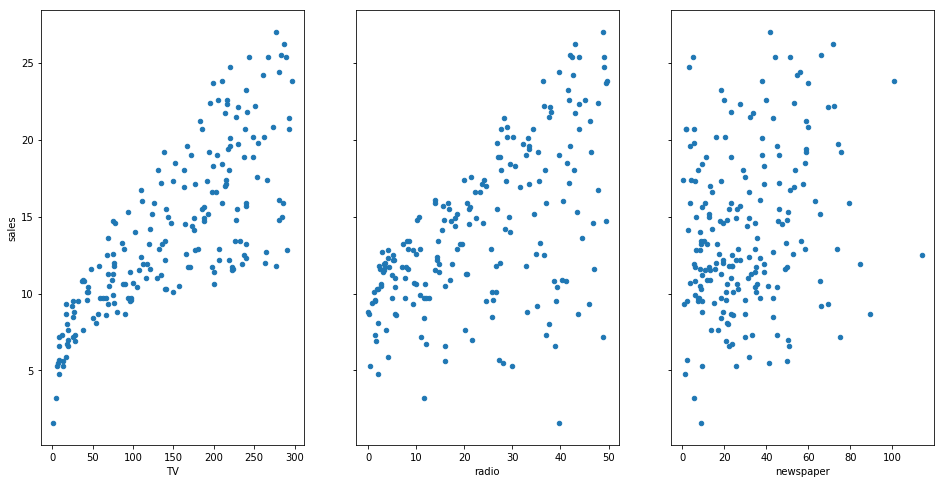

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

O nosso objetivo é analisar os dados e tirar certas conclusões a partir deles. Basicamente, queremos responder as seguintes perguntas:

*** Com base nestes dados, como poderíamos gastar o dinheiro designado para propaganda no futuro? ***

Em outras palavras:

* *Existe uma relação entre o dinheiro gasto em propaganda e a quantidade de vendas?*
* *Quão forte é esse relacionamento?*
* *Quais são os tipos de propaganda que contribuem para as vendas?*
* *Qual o efeito de cada tipo de propaganda nas vendas?*
* *Dado um gasto específico em propaganda, é possível prever quanto será vendido?*

Para explorar essas e outras questões, vamos utilizar, inicialmente, uma **Regressão Linear Simples**.


### Regressão Linear Simples

Como o próprio nome diz, a regressão linear simples é um método muito (muito++) simples para prever valores **(Y)** a partir de uma única variável **(X)**. Para este modelo, é assumido que existe uma aproximação linear entre X e Y. Matematicamente, podemos escrever este relacionamento a partir da seguinte função: 

$Y \approx \beta_0 + \beta_1X$, onde $\approx$ pode ser lido como *aproximadamente*.

$\beta_0$ e $\beta_1$ são duas constantes desconhecidas que representam a intercepção da reta com o eixo vertical ($\beta_0$) e o declive (coeficiente angular) da reta ($\beta_1$). As duas constantes são conhecidas como coeficientes ou parâmetros do modelo. O propósito da regressão linear é utilizar o conjunto de dados conhecidos para estimar os valores destas duas variáveis e definir o modelo aproximado:

$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$,

onde $\hat{y}$ indica um valor estimado de $Y$ baseado em $X = x$. Com essa equação podemo prever, neste caso, as vendas de um determinado produto baseado em um gasto específico em propaganda na TV.

Mas como podemos estimar estes valores?

### Estimando Valores

Na prática, $\beta_0$ e $\beta_1$ são desconhecidos. Para que a gente possa fazer as estimativas, devemos conhecer os valores destes atributos. Para isso, vamos utilizar os dados já conhecidos.

Considere,

$(x_1,y_1), (x_2,y_2), ..., (x_n, y_n)$ $n$ pares de instâncias observadas em um conjunto de dados. O primeiro valor consiste de uma observação de $X$ e o segundo de $Y$. Na base de propagandas, esses dados consistem dos 200 valores vistos anteriormente.

O objetivo na construção do modelo de regressão linear é estimar os valores de $\beta_0$ e $\beta_1$ tal que o modelo linear encontrado represente, da melhor foma, os dados disponibilizados. Em outras palavras, queremos encontrar os valores dos coenficientes de forma que a reta resultante seja a mais próxima possível dos dados utilizados. 

Basicamente, vamos encontrar várias retas e analisar qual delas se aproxima mais dos dados apresentados. Existem várias maneiras de medir essa "proximidade". Uma delas é a RSS (*residual sum of squares*), que é representada pela equação:

$\sum_{i=1}^{N}{(\hat{y_i}-y_i)^2}$, onde $\hat{y_i}$ o valor estimado de y e $y_i$, o valor real.

A figura a seguir apresenta um exemplo que mostra os valores estimados e a diferença residual.

![alt Grafico Regressao Linear](https://www.dropbox.com/s/o64aegrpf21v05i/grafico_regressao_linear1.png?dl=0")

Os pontos vermelhos representam os dados observados; a linha azul, o modelo construído e as linhas cinzas, a diferença residual entre o que foi estimado e o que era real.

Vamos estimar tais parâmetros utilizando *scikit-learn*.

### Aplicação do modelo de regressão linear

O primeiro passo é separar dos dados (*features*) das classes (*labels*) dos dados que serão utilizados para treinar nosso modelo.

In [5]:
# Carregando os dados de treinamento e os labels

feature_cols = ['TV']

X = data[feature_cols] # Dados de Treinamento
y = data.sales # Labels dos dados de Treinamento


Em seguida, vamos instanciar o modelo de Regressão Linear do ScikitLearn e treina-lo com os dados.

In [6]:
lm = LinearRegression() # Instanciando o modelo
lm.fit(X, y) # Treinando com os dados de treinamento

/Users/adolfoguimaraes/Desenvolvimento/ludiicos/tensorflow/tensorenv/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Como dito anteriormente, o modelo aprendeu, baseado no conjunto de dados, valores para $\beta_0$ e $\beta_1$. Vamos visualizar os valores encontrados.

In [7]:
#Imprimindo beta_0
print("Valor de Beta_0: " + str(lm.intercept_))

#Imprimindo beta_1
print("Valor de Beta_1: " + str(lm.coef_[0]))

Valor de Beta_0: 7.03259354913
Valor de Beta_1: 0.047536640433


Esse valores representam os valores de $\beta_0$ e $\beta_1$ da nossa equação que representa um modelo simples de regressão linear onde é levado em consideração somente um atributo. 

Com esses valores é possível estimar quanto será vendido dado um determinado gasto em propaganda de TV. Além disso, o coeficiente $\beta_1$ nos conta mais sobre o problema. 

O valor de $0.047536640433$ indica que cada unidade que aumentarmos em propaganda de TV implica em um aumento de $0.047536640433$ nas vendas. Em outras palavras, cada $1,000$ gastos em TV está associado com um aumento de 47.537 de unidades nas vendas. 

Vamos usar esses valores para estimar quanto será vendido se gastarmos $50000$ em TV.

$y = 7.03259354913 + 0.047536640433 \times 50$



In [8]:
7.03259354913+0.047536640433*50

9.40942557078

Desta forma, poderíamos prever a venda de 9409 unidades.

No entanto, nosso objetivo não é fazer isso manualmente. A idéia é construir o modelo e utiliza-lo para fazer a estimativa de valores. Para isso, vamos utilizar o método *predict*.

Podemos estimar para uma entrada apenas:

In [9]:
lm.predict([[50]])

array([ 9.40942557])

Ou várias:

In [10]:
lm.predict([[50], [200], [10]])

array([  9.40942557,  16.53992164,   7.50795995])

Para entender melhor como a Regressão Linear funciona vamos visualizar no gráfico o modelo construído.

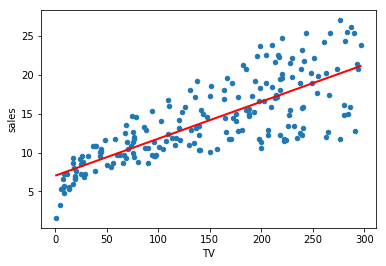

In [12]:
'''
O código a seguir faz a predição para o menor e maior valores de X na base de treinamento. Estes valores
são utilizados para construir uma reta que é plotada sobre os dados de treinamento.
'''

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]}) # Menor e Maior valores de X na base de treinamento
preds = lm.predict(X_new) # Predição destes valores
data.plot(kind='scatter', x='TV', y='sales') # Plotagem dos valores da base de treinamento
plt.plot(X_new, preds, c='red', linewidth=2) # Plotagem da reta

A reta em vermelho representa o modelo de regressão linear construído a partir dos dados passados. 

### Avaliando o Modelo Construído

Para avaliar o modelo construído vamos utilizar uma métrica denominada de $R^2$ (*R-squared* ou coeficiente de determinação). 

(By [Wikipedia](https://pt.wikipedia.org/wiki/R%C2%B2)) 
*O coeficiente de determinação, também chamado de R², é uma medida de ajustamento de um modelo estatístico linear generalizado, como a Regressão linear, em relação aos valores observados. O R² varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o R², mais explicativo é modelo, melhor ele se ajusta à amostra. Por exemplo, se o R² de um modelo é 0,8234, isto significa que 82,34\% da variável dependente consegue ser explicada pelos regressores presentes no modelo.*

Para entender melhor a métrica, vamos analisar o gráfico a seguir:
![alt Grafico R-squared](https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_r_squared.png "R-squared")
*Fonte da Imagem: https://github.com/justmarkham/DAT4/ *


Observe que a função representada pela cor vemelha se ajusta melhor aos dados do que as retas de cor azul e verde. Visualmente podemos ver que, de fato, a curva vemelha descreve melhor a distribuição dos dados plotados.

Vamos calcular o valor do *R-squared* para o modelo construído utilizando o método *score* que recebe como parâmetro os dados de treinamento.


In [13]:
lm.score(X, y)

0.61187505085007099

Sozinho esse valor não nos conta muito. No entanto, ele será bastante útil quando formos comparar este modelo com outros mais à frente.

### Multiple Linear Regression

Podemos estender o modelo visto anteriormente para trabalhar com mais de um atributo, a chamada *Multiple Linear Regression*. Matematicamente, teríamos:

$y \approx \beta_0 + \beta_1 x_1 + ... \beta_n x_n$

Cada $x$ representa um atribuito e cada atributo possui seu próprio coeficiente. Para nossa base de dados, teríamos:

$y \approx \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Vamos construir nosso modelo para este caso:

In [14]:
# Carregando os dados de X e y do dataset
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]
y = data.sales

#Instanciando e treinando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X, y)

#Imprimindo os coeficientes encontrados

print("Valor de Beta_0: ")
print(str(lm.intercept_))
print()
print("Valores de Beta_1, Beta_2, ..., Beta_n: ")
print(list(zip(feature_cols, lm.coef_)))


Valor de Beta_0: 
2.93888936946

Valores de Beta_1, Beta_2, ..., Beta_n: 
[('TV', 0.045764645455397601), ('radio', 0.18853001691820448), ('newspaper', -0.0010374930424762578)]


O modelo construído foi:

$y \approx 2.93888936946 + 0.045764645455397601_1 \times TV + 0.18853001691820448 \times Radio -0.0010374930424762578 \times Newspaper$

Assim como fizemos no primeiro exemplo, podemos utilzar o método *predict* para prever valores não conhecidos.

In [42]:
lm.predict([[100, 25, 25], [200, 10, 10]])

array([ 12.20266701,  13.9667437 ])

Avaliando o modelo, temos o valor para o $R^2$:

In [43]:
lm.score(X, y)

0.89721063817895208

### Entendendo os resultados obtidos

Vamos analisar alguns resultados obtidos nos dois modelos construídos anteriormente. A primeira coisa é verificar o valor de $\beta_1$. Esse valor deu positivo para os atributos *TV* e *Radio* e negativo para o atributo *Newspaper*. Isso significa que o gasto em propaganda está relacionado positivamente às vendas nos dois primeiros atributos. Diferente do que acontece com o *Newspaper*: o gasto está negativamente associado às vendas. 

Uma outra coisa que podemos perceber é que o *R-squared* aumentou quando aumentamos o número de atributos. Isso normalmente acontece com essa métrica. Basicamente, podemos concluir que este último modelo tem um valor mais alto para o *R-squared* que o modelo anterior que considerou apenas a TV como atributo. Isto significa que este modelo fornece um melhor "ajuste" aos dados fornecidos. 

No entanto, o *R-squared* não é a melhor métrica para avaliar tais modelos. Se fizermos um análise estatística mais aprofundada (essa análise foge do escopo desta disciplina. Detalhes podem ser encontrados [aqui](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)) vamos perceber que o atributo *Newspaper* não influencia (estatisticamente) no total de vendas. Teoricamente, poderíamos descartar tal atributo. No entanto, se calcularmos o valor do *R-squared* para um modelo sem *Newspaper* e para o modelo com *Newspaper*, o valor do segundo será maior que o primeiro. 

** Essa tarefa fica como atividade ;) **

## KNN: k-Nearest Neighbors

No início desse tutorial tratamos o problema de aprendizado supervisionado a partir de dois pontos de vista. O primeiro da regressão. Mostramos como trabalhar com a regressão linear para prever valores em um intervalo. O segundo, como o problema de classificação de instâncias em classes. Para exemplificar esse problema, vamos trabalhar com o KNN, uma das técnicas mais simples de classificação. 

A idéia básica do KNN é que podemos classificar uma instância desconhecida com base nas informações dos vizinhos mais próximos. Para isso, exergamos os dados como pontos marcados em um sistema cartesiano e utilizamos a distância entre pontos para identificar quais estão mais próximoas. 

Para entender um pouco mais do KNN, assista [este vídeo](https://www.youtube.com/watch?v=UqYde-LULfs)

Para começar, vamos analisar o conjunto de dados a seguir:

In [17]:
data = pd.read_csv("http://www.data2learning.com/datasets/basehomemulher.csv", index_col=0)
data

,peso,altura,classe
1,50,1.60,0
2,53,1.65,0
3,60,1.58,0
4,62,1.62,0
5,91,1.75,1
6,102,1.85,1
7,105,1.82,1
8,103,1.77,1
9,87,1.73,1


Os dados representam informações de altura e peso coletadas de homens e mulheres. Se plotarmos tais informações no gráfico, temos:

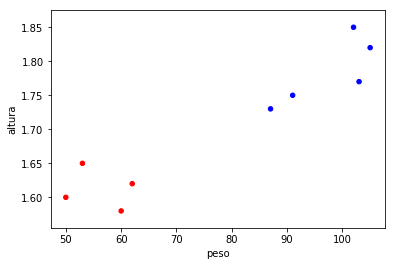

In [30]:
colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='peso', y='altura',c=data['classe'].apply(lambda x: colors[x])) 

Considere que com base nestes dados, desejamos classificar uma nova instância. Vamos considerar uma instância onde a altura seja 1.70 e o peso 50. Se plotarmos esse ponto no gráfico, temos (a nova instância está representada pelo x):

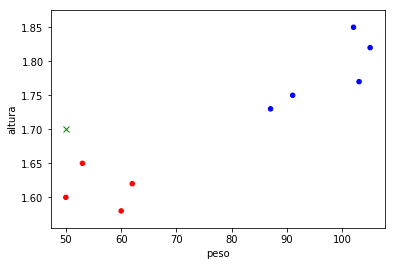

In [19]:
colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='peso', y='altura',c=data['classe'].apply(lambda x: colors[x])) 
plt.plot([50], [1.70], 'x', c='green')

O KNN vai classificar a nova instância com base nos vizinhos mais próximos. Neste caso, a nova instância seria classificada como mulher. Essa comparação é feita com os $k$ vizinhos mais próximos. 

Por exemplo, se considerarmos 3 vizinhos mais próximos e destes 3, dois são mulheres e 1 homem, a instância seria classificada como mulher já que corresponde a classe da maioria dos vizinhos.

A distância entre dois pontos pode ser calculada de diversas formas. A biblioteca do ScikitLearn lista [uma série de métricas de distância](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) que podem ser usadas. Vamos considerar um novo ponto e simular o que o algoritmo do KNN faz.

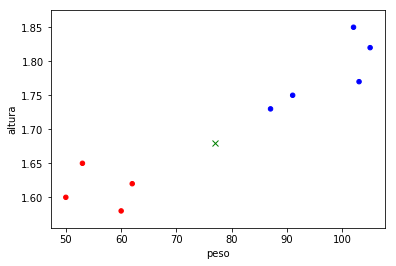

In [20]:
colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='peso', y='altura',c=data['classe'].apply(lambda x: colors[x])) 
plt.plot([77], [1.68], 'x', c='green')

Vamos trabalhar com o ponto **{'altura': 1.68, 'peso':77}** e calcular sua distância para todos os demais pontos. No exemplo vamos usar a distância euclideana: $\sqrt{\sum{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$. Para simplificar, vamos utilizar nossa própria implementação da distância euclideana.

In [21]:
import math

# Calcula a distância euclideana de dois pontos
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)

    return math.sqrt(distance)

# Só para visualização: converte os valores para labels em String
def convert_label(value):
    if value == 0.0: return 'Mulher'
    else: return 'Homem'

# 0 = mulher , 1 = homem
for index, row in data.iterrows():
    print(convert_label(row['classe']), '%0.2f' % euclideanDistance([row['peso'], row['altura']],[77, 1.68], 2))

Mulher 27.00
Mulher 24.00
Mulher 17.00
Mulher 15.00
Homem 14.00
Homem 25.00
Homem 28.00
Homem 26.00
Homem 10.00


Uma vez que calculamos a distância do novo ponto a todos os demais pontos da base, devemos verificar os $k$ pontos mais próximos e ver qual classe predomina nestes pontos. Considerando os 3 vizinhos mais próximos ($k=3$), temos: 

* Homem: 10.0
* Homem: 14.0
* Mulher: 15.0

Sendo assim, a instância selecionada seria classificada como **Homem**.

E se considerássemos $k=5$?

* Homem: 10.0
* Homem: 14.0
* Mulher: 15.0
* Mulher: 17.0
* Mulher: 24.0

Neste caso, a instância seria classificada como **Mulher**.

In [22]:
import math

# Calcula a distância euclideana de dois pontos
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)

    return math.sqrt(distance)

# Só para visualização: converte os valores para labels em String
def convert_label(value):
    if value == 0.0: return 'Mulher'
    else: return 'Homem'

# 0 = mulher , 1 = homem
for index, row in data.iterrows():
    print(convert_label(row['classe']), '%0.2f' % euclideanDistance([row['peso'], row['altura']],[77, 1.68], 2))

Mulher 27.00
Mulher 24.00
Mulher 17.00
Mulher 15.00
Homem 14.00
Homem 25.00
Homem 28.00
Homem 26.00
Homem 10.00


Dá para perceber que o valor de $k$ influencia bastante na classificação dos objetos. Mais para frente usaremos a precisão do modelo para determinar o melhor valor de $k$. Quando o valor de $k$ é muito pequeno, o modelo está mais sensível aos pontos de ruído da base. Quando o $k$ é muito grande, a vizinhança pode incluir elementos de outra classe. Vale ressaltar que, normalmente, escolhemos valores de $k$ ímpar para evitar empates.

Um caso especial do KNN é quando utilizamos K = 1. Vamos considerar o exemplo da imagem a seguir: 

** Dataset de treinamento **

![alt Exemplo KNN](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/04_knn_dataset.png "KNN 1")


Ao considerarmos K = 1, podemos construir um mapa de classificação, como é mostrado a seguir:

** Mapa de classificação para o KNN (K=1) **

![alt Exemplo KNN](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/04_1nn_map.png "KNN 1")
> *Image Credits: Data3classes, Map1NN, Map5NN by Agor153. Licensed under CC BY-SA 3.0*

Uma nova instância será classificada de acordo com a região na qual ela se encontra.

Para finalizar, vale ressaltar dois pontos. O primeiro é que em alguns casos faz-se necessário normalizar os valores da base de treinamento por conta da discrepância entre as escalas dos atributos. Por exemplo, podemos ter altura em um intervalo de 1.50 à 1.90, peso no intervalo de 60 à 100 e salário no intervalo de 800 à 1500. Essa diferença de escalas pode fazer com que as medidas das distâncias sejam influenciadas por um único atributo.

Um outro pronto é em relação as vantagens e desvantagens desta técnica. A principal vantagem de se usar um KNN é que ele é um modelo simples de ser implementado. No entanto, ele possui um certo custo computacional no cálculo da distância entre os pontos. Um outro problema é que a qualidade da classificação pode ser severamente prejudicada com a presença de ruídos na base.



### Implementando o KNN com ScikitLearn

Vamos implementar o KNN utilizando o ScikitLearn e realizar as tarefas de classificação para a base da Iris.

In [31]:
# Importando o Dataset
from sklearn.datasets import load_iris

data_iris = load_iris()
X = data_iris.data
y = data_iris.target

Ao instanciar o modelo do KNN devemos passar o parâmetro *n_neighbors* que corresponde ao valor $k$, a quantidade de vizinhos próximos que será considerada.

In [24]:
# Importando e instanciando o modelo do KNN com k = 1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Instanciado o modelo, vamos treina-lo com os dados de treinamento.

In [25]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Assim como fizemos com a regressão linear, podemos utilizar o modelo construído para fazer a predição de dados que ainda não foram analisados.

In [35]:
# O método predict retorna a classe na qual a instância foi classificada
predict_value = knn.predict([[3, 5, 4, 2],[1,2,3,4]])
print(predict_value)
print(data_iris.target_names[predict_value[0]])
print(data_iris.target_names[predict_value[1]])

[2 2]
virginica
virginica


### Avaliando e escolhendo o melhor modelo

Para que possamos escolher o melhor modelo, devemos primeiro avalia-los. A avaliação do modelo de classificação é feita por meio da métrica denominada de **acurácia**. A acurácia corresponde a taxa de acerto do modelo. Um modelo que possui $90\%$ de acurácia acertou a classe em $90\%$ dos casos que foram analisados.

Vale ressaltar que a escolha do melhor modelo depende de vários fatores por isso precisamos testar diferentes modelos para diferentes bases com diferentes parâmetros. Isso será melhor abordado mais a frente no nosso curso. Para simplificar, vamos trabahar com dois modelos do KNN para a base Iris. O primeiro com um K=3 e outro com K = 10.

In [36]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y)

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
accuracy_3 = knn_3.score(X, y)
accuracy_10 = knn_10.score(X, y)

In [29]:
print('Acurácia com k = 3: ', '%0.4f'% accuracy_3)
print('Acurácia com k = 10: ', '%0.4f'% accuracy_10)

Acurácia com k = 3:  0.9600
Acurácia com k = 10:  0.9800


Neste caso, o modelo com k = 10 é um modelo que acertou mais casos que o modelo com k = 3. 

A acurácia calculada nos exemplos de Regressão Linear e KNN são chamadas de **acurácia no treinamento**. A acurácia recebe esse nome pois o modelo foi treinado e testado na mesma base. Quando treinamos e testamos nosso modelo com a mesma base, caímos no risco de construir um modelo que não seja capaz de generalizar aquele conhecimento adquirido. Normalmente, quando isso acontece, lidamos com um problema chamado de *overfit*. O correto é treinarmos nosso modelo com uma base e testar com um conjunto de dados novo para o modelo. Desta forma, aumentamos as chances de construir um modelo capaz de generalizar o "conhecimento" extraído da base de dados.

O ideal é que pudéssemos treinar e testar o modelo em bases distintas. No próximo tutorial, vamos mostrar como podemos dividir a base em treino/teste e trabalhar com o que chamamos de **validação cruzada**.

Até o próximo tutorial ;)